In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
data= pd.read_csv('car data.csv')

In [4]:
fueldummy= pd.get_dummies(data.Fuel_Type, drop_first=True)

In [5]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
sellerdummy= pd.get_dummies(data.Seller_Type, drop_first=True)
transdummy= pd.get_dummies(data.Transmission, drop_first=True)

In [7]:
yearold= 2020-data['Year']

In [8]:
data['year_old']= yearold

In [9]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year_old
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,4
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,5
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,11
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,3


In [10]:
data= pd.concat([data,fueldummy,sellerdummy,transdummy],axis=1)

In [11]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year_old,Diesel,Petrol,Individual,Manual
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6,0,1,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9,0,1,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,4,1,0,0,1
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,5,0,1,0,1
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,11,0,1,0,1
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,3,1,0,0,1


In [12]:
data.drop(['Car_Name','Fuel_Type','Seller_Type','Transmission'], axis=1, inplace=True)

In [13]:
data.drop('Year', axis=1, inplace=True)

In [14]:
data

,Selling_Price,Present_Price,Kms_Driven,Owner,year_old,Diesel,Petrol,Individual,Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


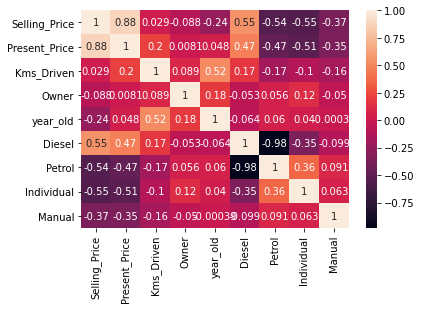

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr(),annot=True)
plt.show()

In [16]:
x= data.drop('Selling_Price', axis=1)
y=data.Selling_Price

In [17]:
xtr,xte,ytr,yte= train_test_split(x,y,test_size=0.2)

In [18]:
xte

,Present_Price,Kms_Driven,Owner,year_old,Diesel,Petrol,Individual,Manual
291,6.10,31427,0,5,0,1,0,1
115,1.47,17500,0,5,0,1,1,1
77,12.35,135154,0,16,0,1,0,0
290,6.40,19000,0,6,0,1,0,1
35,7.74,49998,0,9,0,0,0,1
...,...,...,...,...,...,...,...,...
110,1.78,6000,0,4,0,1,1,1
33,9.95,45000,0,6,1,0,0,1
48,7.71,25870,0,5,0,1,0,1
114,1.47,17000,0,5,0,1,1,1


In [19]:
xte.to_csv('xte.csv')

In [48]:
from sklearn.ensemble import ExtraTreesRegressor

In [49]:
tree= ExtraTreesRegressor()
tree.fit(x,y)

ExtraTreesRegressor()

In [50]:
for i, j in zip(x.columns,tree.feature_importances_):
    print(i,j)

Present_Price 0.36451535136930124
Kms_Driven 0.04015481146530355
Owner 0.0009138786699884685
year_old 0.07691700498658394
Diesel 0.23427810111789388
Petrol 0.00675094568767998
Individual 0.136170463102991
Manual 0.140299443600258


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [59]:
n_estimators=[int(x) for x in np.linspace(100,1200,12)]
min_samples_split= [2,5,10,15,100]
min_samples_leaf= [1,2,5,10]
max_features=['auto', 'sqrt']
max_depth=[int(x) for x in np.linspace(5,30,6)]
params={
    'n_estimators':n_estimators,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features,
    'max_depth':max_depth
}

In [61]:
rf= RandomForestRegressor()
model=RandomizedSearchCV(rf, param_distributions=params,n_iter=10,scoring='neg_mean_squared_error',n_jobs=1,cv=5, verbose=1)

In [62]:
model.fit(xtr,ytr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   39.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=1)

In [63]:
model.predict(xte)

array([ 0.66614286,  0.46657143,  9.77195714,  7.1654    ,  0.71885714,
        1.63258571,  6.62131429,  2.80014286, 17.3491    ,  0.26275714,
        5.3885    ,  5.60775714,  0.42928571,  8.49625714,  0.6149    ,
        6.04742857,  3.97078571,  5.66048571,  7.3906    ,  0.20301429,
        2.86935714,  3.16227143,  6.22072857,  0.45801429,  8.90892857,
        3.1195    ,  0.34027143,  0.25917143, 15.47441429,  0.6982    ,
        8.75292857,  0.35767143,  4.22014286,  0.60347143,  1.13041429,
        0.51837143,  5.82592857,  6.42947143,  0.21757143,  0.40482857,
        0.38085714,  0.63892857,  3.97878571,  2.65071429,  1.66242857,
        4.85735714,  3.03185714,  4.36401429,  3.00771429,  7.09964286,
        8.79854286,  5.8906    , 20.11334286, 17.72747143,  6.78081429,
        0.294     ,  7.14614286,  9.57292857,  5.38671429,  0.26515714,
        0.58824286])

In [65]:
import pickle

with open("rf.pkl",'wb') as file:
    pickle.dump(model,file)